<a href="https://colab.research.google.com/github/DanielACocolete/GeracaoDeImagem/blob/main/GeracaoDeNumeroImagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy scikit-learn matplotlib

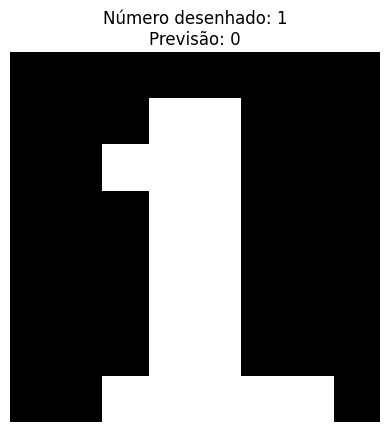

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Função para criar uma matriz de imagem de um número
def create_number_array(number, image_size=(8, 8)):
    # Criar uma matriz 8x8 com zeros
    img_array = np.zeros(image_size)

    # Definir padrões simples para cada número (apenas como exemplo)
    patterns = {
        0: [
            [0, 1, 1, 1, 1, 1, 0],
            [1, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 1],
            [0, 1, 1, 1, 1, 1, 0],
        ],
        1: [
            [0, 0, 1, 1, 0, 0, 0],
            [0, 1, 1, 1, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 0],
            [0, 0, 1, 1, 0, 0, 0],
            [0, 1, 1, 1, 1, 1, 0],
        ],
        # Adicione padrões para outros números conforme necessário
    }

    pattern = patterns.get(number, np.zeros((7, 7)))  # Obter o padrão ou uma matriz vazia
    img_array[1:8, 1:8] = pattern  # Inserir o padrão na matriz 8x8

    return img_array

# Carregar dataset MNIST
mnist = datasets.load_digits()
X, y = mnist.images, mnist.target
X = X.reshape((X.shape[0], -1))  # Redimensionar as imagens para vetores de uma dimensão

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Treinar o classificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Número predefinido
number = 1

# Criar matriz do número
img_array = create_number_array(number)

# Converter a matriz para um vetor
img_vector = img_array.reshape(1, -1)

# Prever o número usando o classificador KNN
predicted_number = knn.predict(img_vector)

# Mostrar a imagem e a previsão
plt.imshow(img_array, cmap='gray')
plt.title(f'Número desenhado: {number}\nPrevisão: {predicted_number[0]}')
plt.axis('off')
plt.show()